위키북스 '데이터 분석가가 반드시 알아야 할 모든 것'의 실습 필사입니다.


# 10.2.3. 공분산과 상관성 분석

**공분산**
- 서로 공유하는 분산, 두 분산의 관계
    - 양의 상관 관계: X1이 커지면 X2도 커진다.
    - 음의 상관 관계: X1이 커지면 X2는 작아진다.
    - 무 상관 관계: X1과 X2는 선형적인 관계가 없다.
    - (-)1: X1과 X2는 완벽한 직선의 관계다.
- 각 변수 간의 다른 척도 기준이 그대로 반영되어 공분산 값이 지니는 크기가 상관성의 정도를 나타내지는 못 한다. 즉, 단순한 상관관계의 방향만 알려줄 뿐, 상관관계의 정도는 알 수 없다.
- 이를 해결하기 위해 공분산을 변수 각각의 표준편차 값으로 나누는 **정규화**를 통하여 상관성을 비교할 수 있다.


**피어슨 상관계수**
- 변수 X1과 X2가 함께 변하는 정도(공분산)을 X1과 X2가 변하는 전체 정도로 나눠준 것, -1과 1사이에 값이 존재한다.
- 0.7 이상일 경우 상관관계가 매우 높다고 하며 0.4 이상이면 어느 정도 상관관계가 있다고 해석한다.
- 이때, 산점도의 기울기와 상관계수는 관련이 없다는 것에 주의하자.
- 상관계수가 높다는 것은 X1이 움직일 때 X2도 많이 움직인다는 뜻이 아니라 X2를 예상할 수 있는 정확도, 즉 설명력이 높다는 것이다.

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('datasets/coefficients_all.csv')
print(df.shape)
df.head()

(2281, 174)


,state_fips_code,county_fips_code,Unemployment_rate_grams_oxy,Unemployment_rate_quant_oxy,Unemployment_rate_grams_hydro,Unemployment_rate_quant_hydro,median_household_income_grams_oxy,median_household_income_quant_oxy,median_household_income_grams_hydro,median_household_income_quant_hydro,...,est_total_bedrooms_grams_hydro,est_total_bedrooms_quant_hydro,pop_labor_jobs_grams_oxy,pop_labor_jobs_quant_oxy,pop_labor_jobs_grams_hydro,pop_labor_jobs_quant_hydro,Opioid_death_Crude_Rate_grams_oxy,Opioid_death_Crude_Rate_quant_oxy,Opioid_death_Crude_Rate_grams_hydro,Opioid_death_Crude_Rate_quant_hydro
0,1,1,0.777246,0.535326,0.419102,0.929584,0.956483,0.879069,0.635000,0.794693,...,0.611250,0.806661,-0.859117,-0.897621,-0.259982,0.689908,NaN,NaN,NaN,NaN
1,1,3,0.662205,0.669719,0.740070,0.258200,0.715374,0.751435,0.835861,0.420878,...,-0.698539,-0.453366,-0.958199,-0.965650,-0.945551,-0.838114,-0.70441,-0.713492,-0.562337,-0.437559
2,1,5,0.629519,0.548278,0.611866,0.621117,0.087269,0.199057,0.370513,0.270253,...,0.803536,0.837692,-0.977588,-0.975966,-0.873049,-0.867402,NaN,NaN,NaN,NaN
3,1,7,0.365163,0.330020,0.517604,0.177306,-0.438858,-0.521370,-0.026814,-0.295717,...,0.656532,0.602386,-0.961512,-0.973716,-0.864463,-0.929792,NaN,NaN,NaN,NaN
4,1,9,0.456854,0.478953,0.563684,0.419977,-0.155894,-0.162249,-0.020084,0.003799,...,0.869821,0.771564,-0.797750,-0.808559,-0.742671,-0.854260,NaN,NaN,NaN,NaN


In [6]:
# 모두 숫자형 변수로 구성되어 있으므로 공분석과 상관계수를 분석하기에 적합하다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2281 entries, 0 to 2280
Columns: 174 entries, state_fips_code to Opioid_death_Crude_Rate_quant_hydro
dtypes: float64(172), int64(2)
memory usage: 3.0 MB


In [45]:
# 원래 실습 데이터와 다른 실습 데이터라 추출해서 확인해보기로 한다.
df = df.iloc[1:30, 1:16]
df.shape

(28, 13)

In [ ]:
# 산점도 행렬 시각화
sns.set(font_scale=1.1) # 폰트 크기 설정
sns.set_style('ticks') # 축 눈금 설정
sns.pairplot(df, 
             diag_kind='kde' # 동일한 변수의 산점도를 분포로 표시, 
                             # 동일한 변수는 일직선으로만 나오기 때문에 큰 의미가 없으므로 분포로도로 변환하여 정보량을 늘린다
            )  
plt.show()


# 아래와 같이 그래프가 나와야하는데 시간이 너무 오래 걸려, 출력을 못 했다

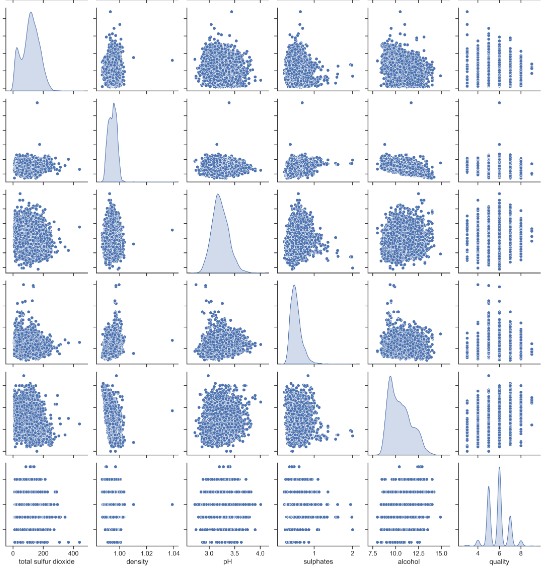

In [35]:
# 공분산 확인
df.cov()

# 각 변수 간의 다른 척도기준이 그대로 반영되어 직관적으로 상관성의 높낮음을 파악하기 힘들다

,county_fips_code,Unemployment_rate_grams_oxy,Unemployment_rate_quant_oxy,Unemployment_rate_grams_hydro,Unemployment_rate_quant_hydro,median_household_income_grams_oxy,median_household_income_quant_oxy,median_household_income_grams_hydro,median_household_income_quant_hydro,median_home_value_grams_oxy,median_home_value_quant_oxy,median_home_value_grams_hydro,median_home_value_quant_hydro,median_monthly_housing_costs_grams_oxy
county_fips_code,312.758621,-0.176573,0.469925,-0.181379,0.688867,1.342024,2.396248,1.505074,1.853253,-4.455334,-4.150961,-3.892300,-3.117810,-1.071533
Unemployment_rate_grams_oxy,-0.176573,0.393598,0.374311,0.358166,0.259966,0.076827,0.049479,0.053366,0.031502,0.145848,0.143879,0.171787,0.184662,0.074510
Unemployment_rate_quant_oxy,0.469925,0.374311,0.376110,0.371548,0.259922,0.079256,0.074237,0.080163,0.052643,0.123296,0.129667,0.156913,0.170061,0.051189
Unemployment_rate_grams_hydro,-0.181379,0.358166,0.371548,0.445463,0.307976,0.068192,0.076445,0.112416,0.069132,0.164304,0.172496,0.148047,0.159220,0.110895
Unemployment_rate_quant_hydro,0.688867,0.259966,0.259922,0.307976,0.334255,0.044418,0.055216,0.079260,0.074675,0.123781,0.124425,0.120210,0.120168,0.067309
median_household_income_grams_oxy,1.342024,0.076827,0.079256,0.068192,0.044418,0.360723,0.350945,0.333905,0.320887,0.031941,0.018781,0.006859,0.056072,0.039750
median_household_income_quant_oxy,2.396248,0.049479,0.074237,0.076445,0.055216,0.350945,0.386347,0.370724,0.350601,0.013948,0.021938,0.003045,0.036541,0.015161
median_household_income_grams_hydro,1.505074,0.053366,0.080163,0.112416,0.079260,0.333905,0.370724,0.379428,0.345360,0.043185,0.051748,0.015679,0.051905,0.043202
median_household_income_quant_hydro,1.853253,0.031502,0.052643,0.069132,0.074675,0.320887,0.350601,0.345360,0.340071,0.019168,0.021636,-0.006921,0.032393,0.024094
median_home_value_grams_oxy,-4.455334,0.145848,0.123296,0.164304,0.123781,0.031941,0.013948,0.043185,0.019168,0.393206,0.402089,0.386479,0.358949,0.110851


In [36]:
# 피어슨 상관계수 확인
df.corr()

# df.corr(method='person')
# 피어슨 상관계수가 기본값이므로 method 옵션 생략 가능
# cov() 와 corr()은 알아서 문자형 변수 제외하고 변수 간 상관관계 계산해준다.
# 다만 가독성을 위해 수치적 의미가 없는 변수는 drop()으로 미리 제거해주는 게 좋다.

,county_fips_code,Unemployment_rate_grams_oxy,Unemployment_rate_quant_oxy,Unemployment_rate_grams_hydro,Unemployment_rate_quant_hydro,median_household_income_grams_oxy,median_household_income_quant_oxy,median_household_income_grams_hydro,median_household_income_quant_hydro,median_home_value_grams_oxy,median_home_value_quant_oxy,median_home_value_grams_hydro,median_home_value_quant_hydro,median_monthly_housing_costs_grams_oxy
county_fips_code,1.000000,-0.015914,0.043328,-0.015367,0.067374,0.126348,0.217991,0.138162,0.179699,-0.401759,-0.359414,-0.323316,-0.275871,-0.158058
Unemployment_rate_grams_oxy,-0.015914,1.000000,0.972857,0.855365,0.716723,0.203891,0.126883,0.138093,0.086104,0.370736,0.351174,0.402244,0.460589,0.309815
Unemployment_rate_quant_oxy,0.043328,0.972857,1.000000,0.907720,0.733071,0.215173,0.194748,0.212204,0.147196,0.320615,0.323760,0.375860,0.433919,0.217739
Unemployment_rate_grams_hydro,-0.015367,0.855365,0.907720,1.000000,0.798126,0.170115,0.184269,0.273437,0.177618,0.392584,0.395752,0.325852,0.373296,0.433433
Unemployment_rate_quant_hydro,0.067374,0.716723,0.733071,0.798126,1.000000,0.127918,0.153651,0.222562,0.221489,0.341432,0.329548,0.305440,0.325244,0.303702
median_household_income_grams_oxy,0.126348,0.203891,0.215173,0.170115,0.127918,1.000000,0.940077,0.902550,0.916180,0.084811,0.047882,0.016777,0.146090,0.172652
median_household_income_quant_oxy,0.217991,0.126883,0.194748,0.184269,0.153651,0.940077,1.000000,0.968272,0.967254,0.035785,0.054046,0.007197,0.091993,0.063627
median_household_income_grams_hydro,0.138162,0.138093,0.212204,0.273437,0.222562,0.902550,0.968272,1.000000,0.961442,0.111804,0.128642,0.037392,0.131858,0.182961
median_household_income_quant_hydro,0.179699,0.086104,0.147196,0.177618,0.221489,0.916180,0.967254,0.961442,1.000000,0.052418,0.056811,-0.017435,0.086923,0.107780
median_home_value_grams_oxy,-0.401759,0.370736,0.320615,0.392584,0.341432,0.084811,0.035785,0.111804,0.052418,1.000000,0.981891,0.905403,0.895746,0.461153


<Axes: >

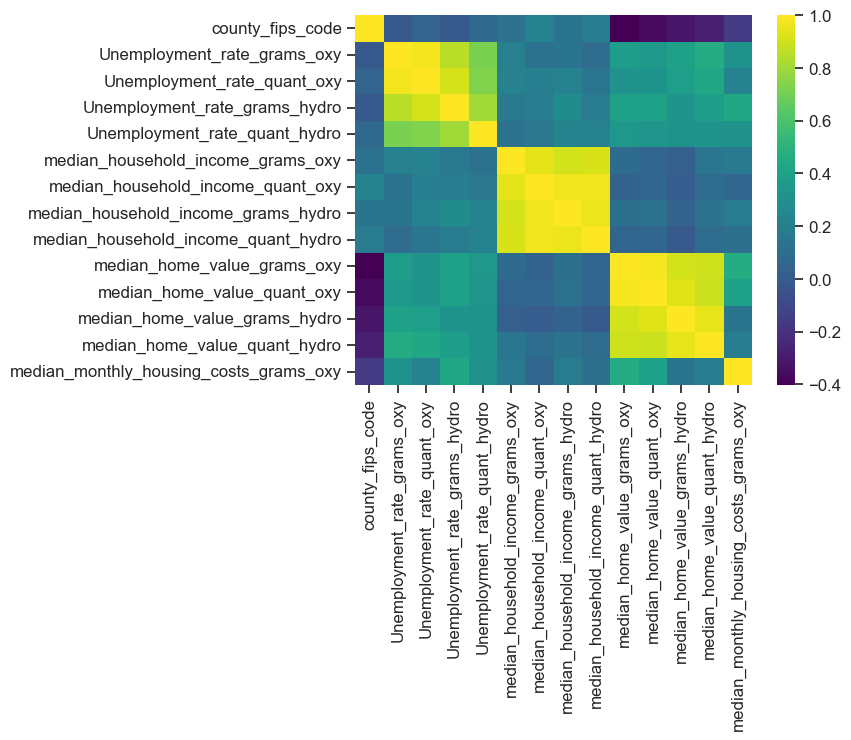

In [37]:
# 히트맵 시각화
sns.heatmap(df.corr(), cmap='viridis')

# 노란색으로 갈수록 양의 상관관계, 보라색에 가까울수록 음의 상관관계

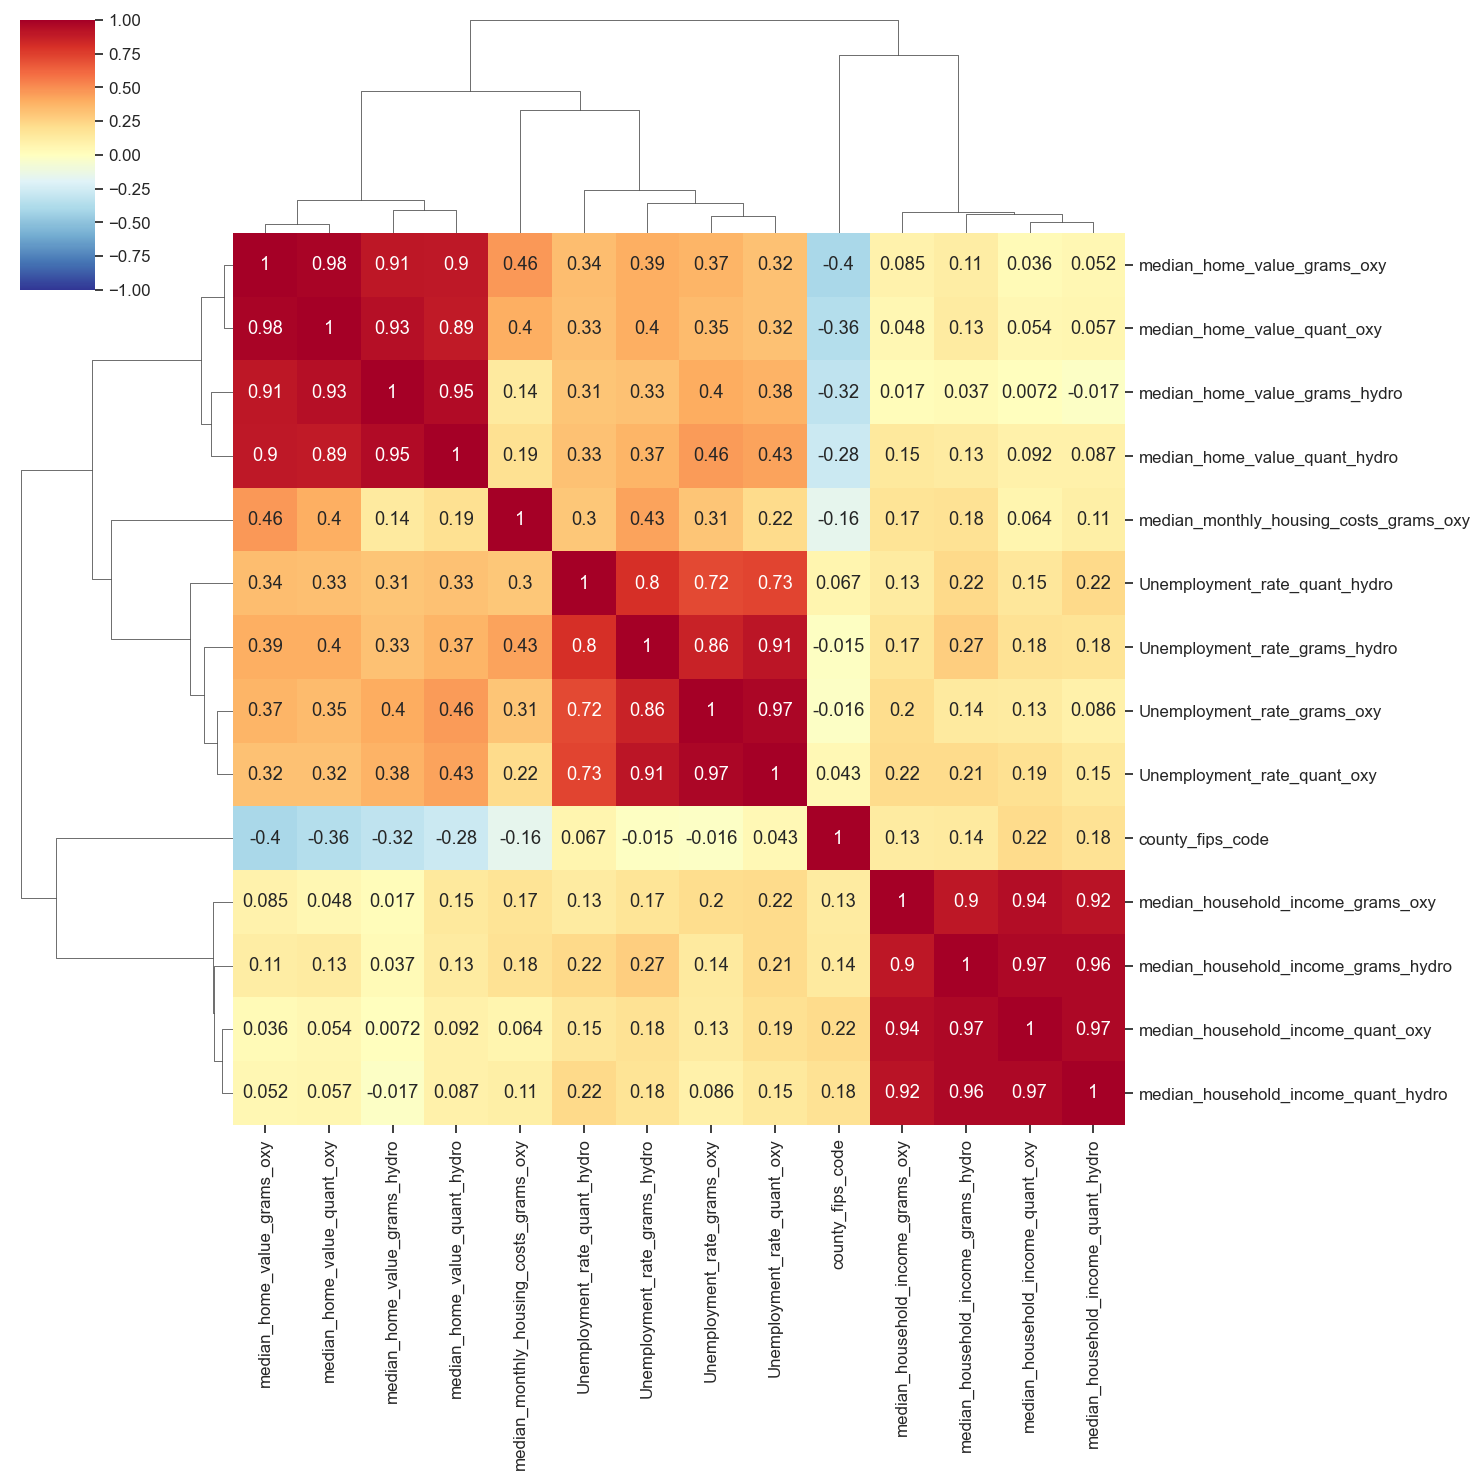

In [39]:
# clustermap 히트맵 시각화
# 기존 히트맵에 상관성이 강한 변수들끼리 묶어서 표현해주는 기능 추가
sns.clustermap(df.corr(), 
               annot = True,      
               cmap = 'RdYlBu_r',  
               vmin = -1, vmax = 1,
               figsize=(15, 15)
              );

In [33]:
# clustermap 사용할 때
# The condensed distance matrix must contain only finite values. 오류 시, 유한한 값 확인
# False가 없어야 히트맵 그릴 수 있다.
np.isfinite(df.corr())

,state_fips_code,county_fips_code,Unemployment_rate_grams_oxy,Unemployment_rate_quant_oxy,Unemployment_rate_grams_hydro,Unemployment_rate_quant_hydro,median_household_income_grams_oxy,median_household_income_quant_oxy,median_household_income_grams_hydro,median_household_income_quant_hydro,median_home_value_grams_oxy,median_home_value_quant_oxy,median_home_value_grams_hydro,median_home_value_quant_hydro,median_monthly_housing_costs_grams_oxy
state_fips_code,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
county_fips_code,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Unemployment_rate_grams_oxy,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Unemployment_rate_quant_oxy,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Unemployment_rate_grams_hydro,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
Unemployment_rate_quant_hydro,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
median_household_income_grams_oxy,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
median_household_income_quant_oxy,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
median_household_income_grams_hydro,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True
median_household_income_quant_hydro,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True


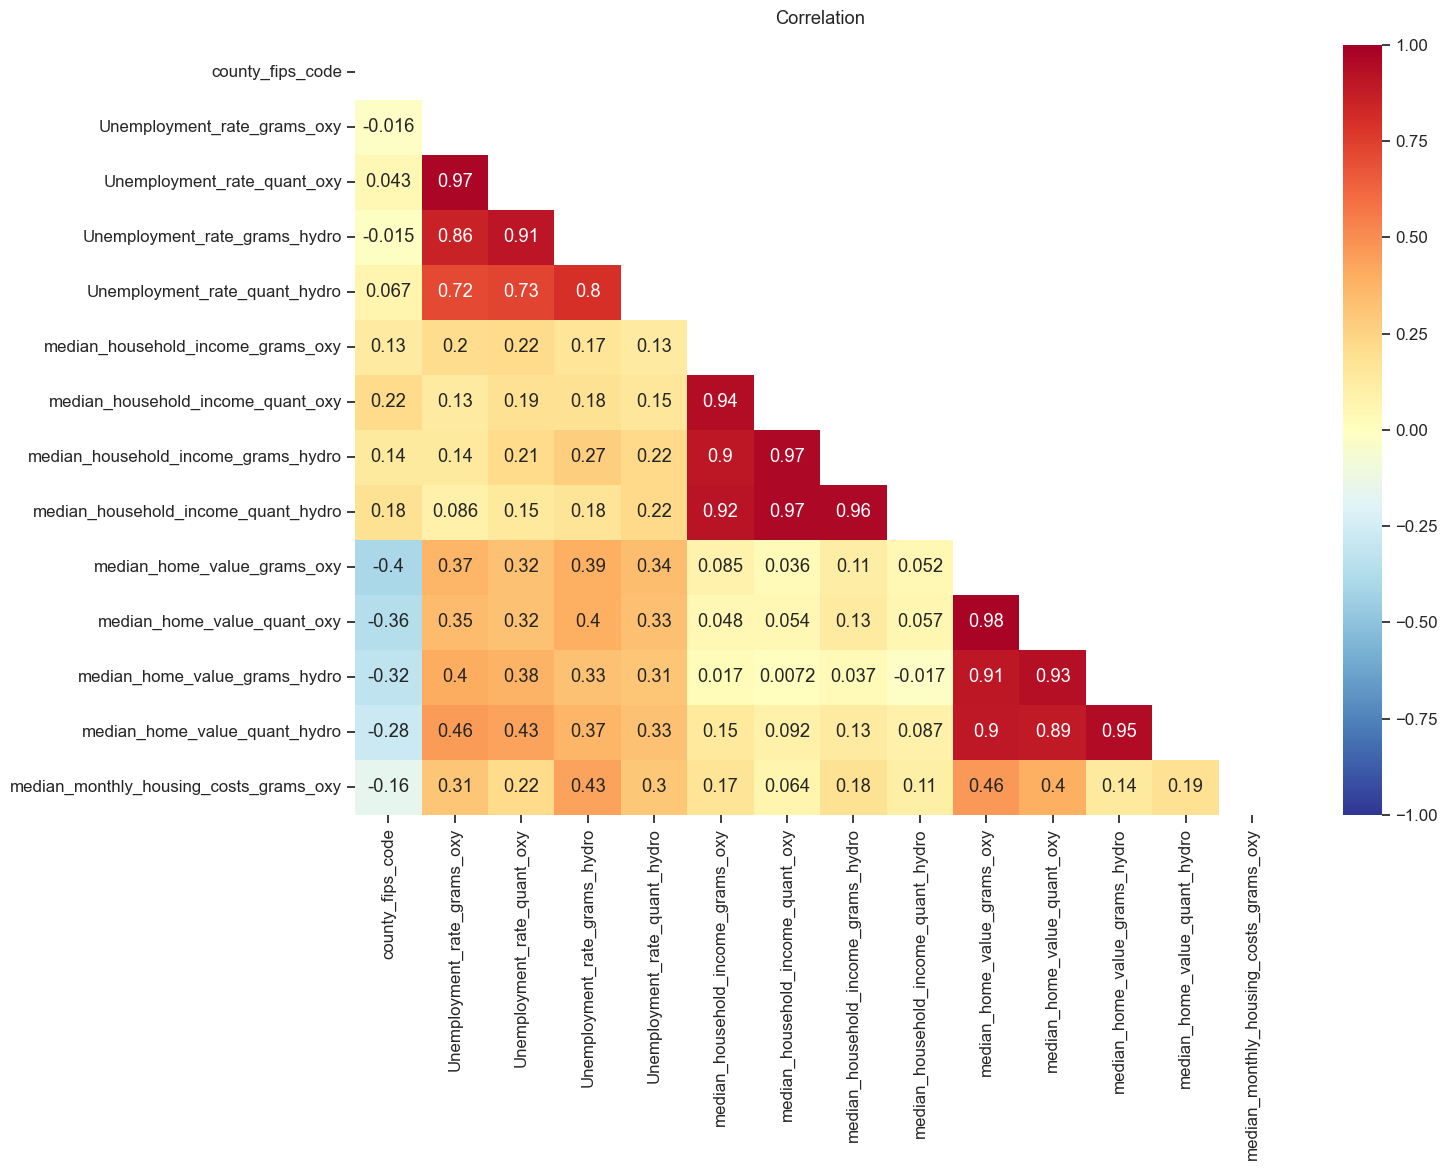

In [43]:
# 중복 제거 히트맵 시각화

# 매트릭스의 우측 상단을 모두 True인 1로, 하단을 False인 0으로 변환
np.triu(np.ones_like(df.corr()))

# True/False mask 배열로 변환
mask = np.triu(np.ones_like(df.corr()))

# 히트맵 그래프 생성
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), mask=mask, # mask: 중복된 값을 가진 삼각형을 표현하지 않는다.
            vmin=-1, vmax=1, annot=True, cmap='RdYlBu_r', cbar=True)
ax.set_title('Correlation', pad=15);

- np.triu(): 넘파이 상삼각성분만 남기기 
    - 상삼각 행렬: 주대각선(diagonal)을 기준으로 대각선 아래쪽에 있는 요소들을 모두 0으로 만든 행렬
- np.ones_like: 주어진 배열과 동일한 shape와 데이터 타입을 가지면서 모든 요소가 1로 채워진 새로운 배열 생성